In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/Walmart_Store_sales.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Walmart_Store_sales.csv'

In [4]:
print(data.head())

NameError: name 'data' is not defined

In [4]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

has_missing_values = data.isnull().values.any()
print(has_missing_values)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
False


In [5]:
# Detecting and removing outliers (simple method based on quantiles)
q_low = data['Weekly_Sales'].quantile(0.01)
q_hi  = data['Weekly_Sales'].quantile(0.99)

data_filtered = data[(data['Weekly_Sales'] > q_low) & (data['Weekly_Sales'] < q_hi)]

data_filtered

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [1]:
#3) Descriptive Statistics
# Basic descriptive statistics
print(data_filtered['Weekly_Sales'].describe())

# Median
print("Median:", data_filtered['Weekly_Sales'].median())

NameError: name 'data_filtered' is not defined

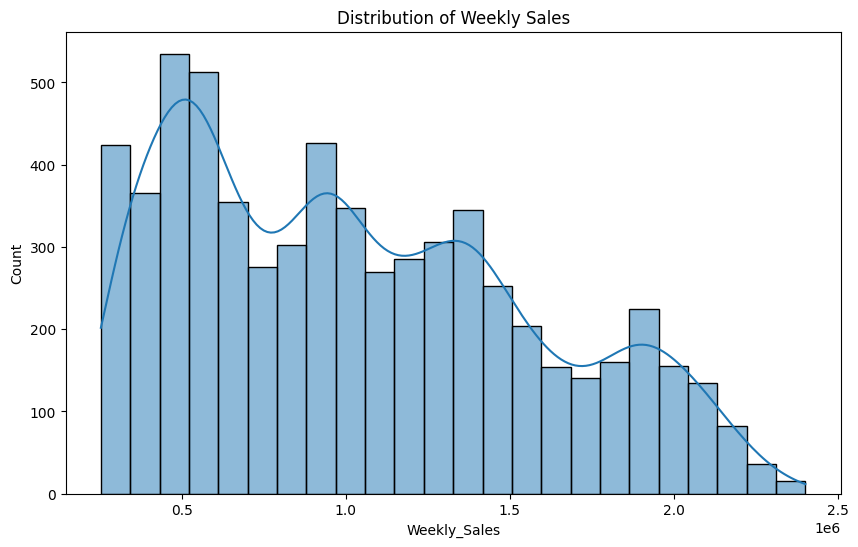

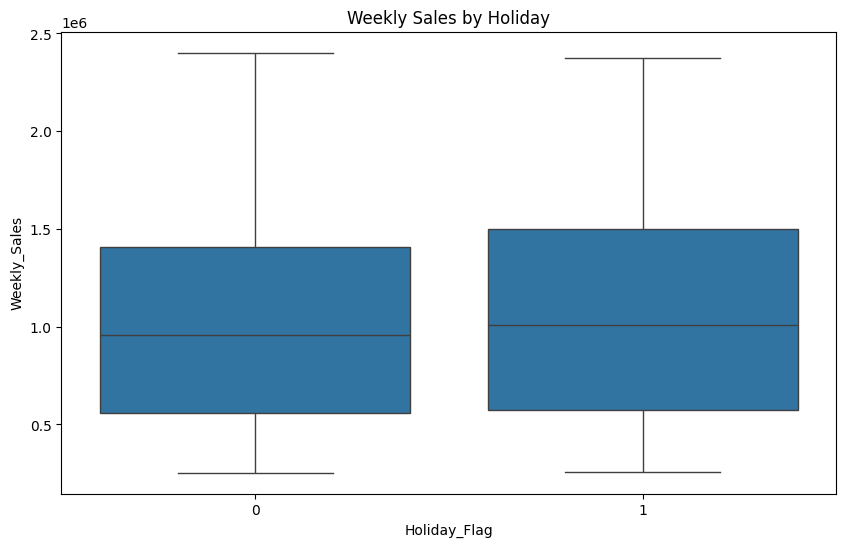

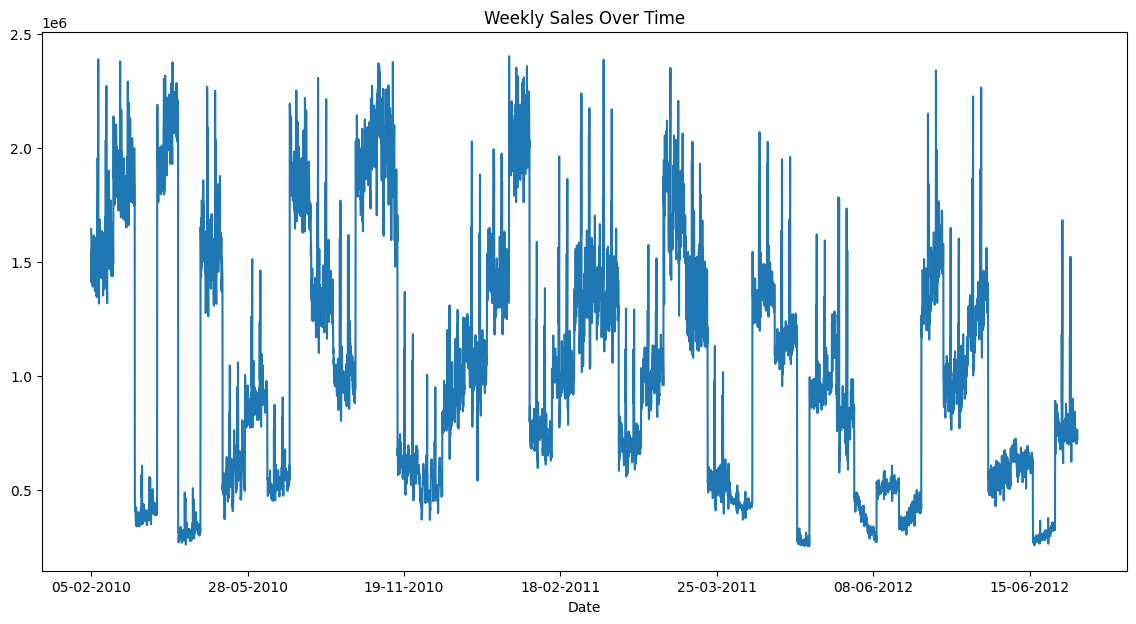

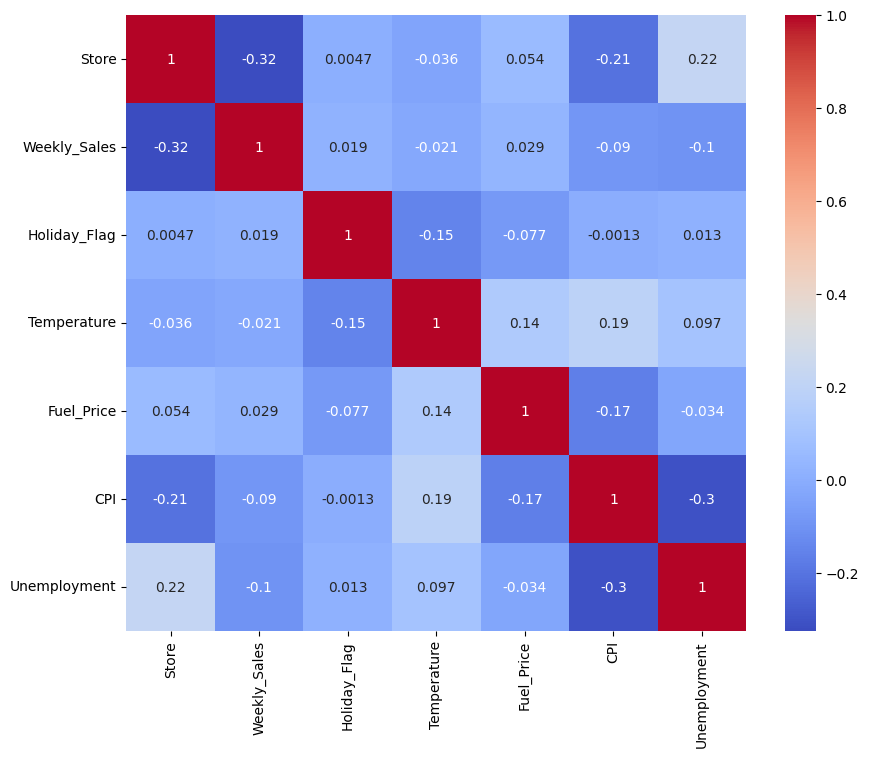

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly Sales')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data_filtered)
plt.title('Weekly Sales by Holiday')
plt.show()

# Time Series Plot
data_filtered.set_index('Date', inplace=True)
data_filtered['Weekly_Sales'].plot(figsize=(14, 7))
plt.title('Weekly Sales Over Time')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm')
plt.show()


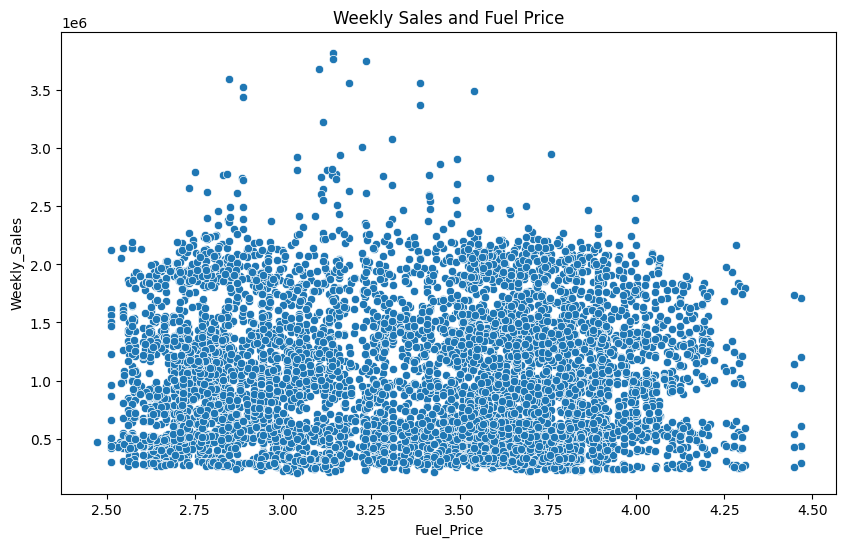

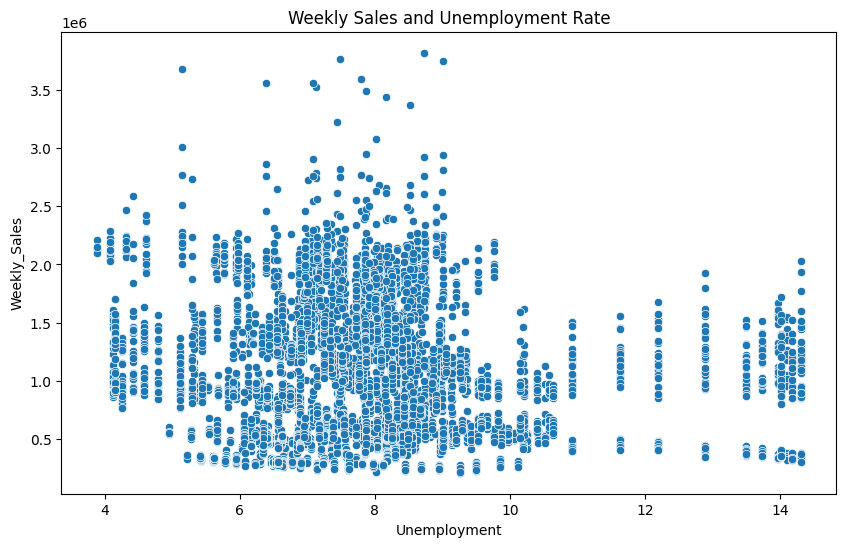

In [8]:
#5) Insightful Analysis
#Impact of External Factors
# Relationship between 'Fuel_Price' and 'Weekly_Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
plt.title('Weekly Sales and Fuel Price')
plt.show()

# Analyzing sales around different levels of unemployment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Weekly Sales and Unemployment Rate')
plt.show()

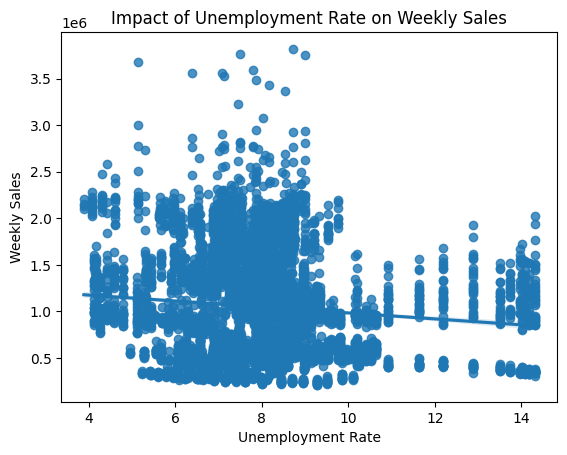

In [14]:
# Explore the impact of unemployment rate on sales.
sns.regplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Impact of Unemployment Rate on Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

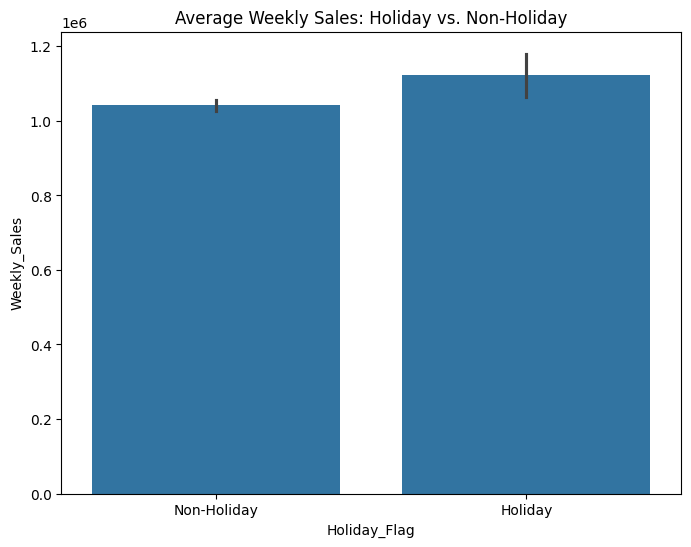

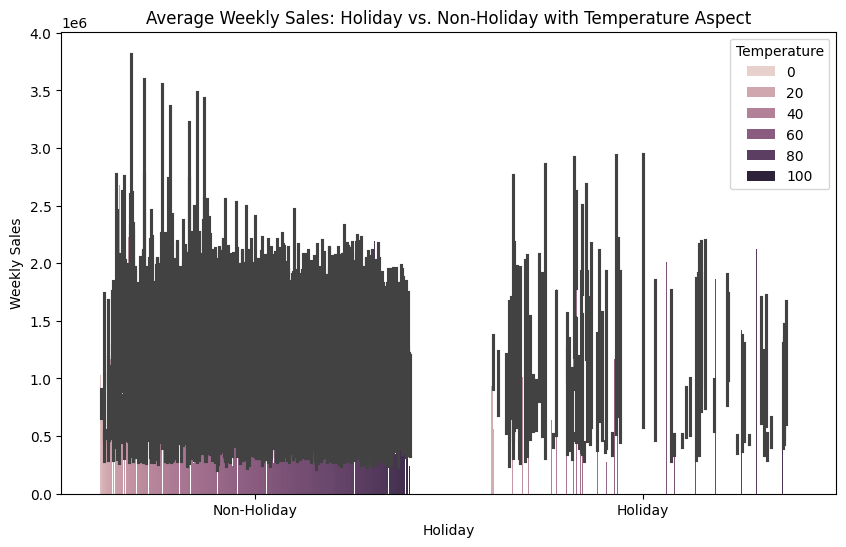

In [21]:
#Seasonality and Holiday Impact (Revisited):

#Given your clarification, the approach to analyzing holiday impact remains similar to before,
# Average Sales during Holiday vs. Non-Holiday weeks
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()

# Plot Average Weekly Sales during Holiday vs. Non-Holiday weeks with temperature aspect
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', hue='Temperature', data=data)
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday with Temperature Aspect')
plt.xlabel('Holiday')
plt.ylabel('Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.legend(title='Temperature')
plt.show()

In [16]:
#1. Identify the Top 3 Contributors/Influencers in the Dataset
#We'll consider "contributors/influencers" as variables that strongly correlate with Weekly_Sales.
# Calculate correlation matrix
corr_matrix = data.corr()

# Sort by 'Weekly_Sales' correlation
top_contributors = corr_matrix['Weekly_Sales'].sort_values(key=abs, ascending=False)[1:4]
print("Top 3 contributors to Weekly Sales:")
print(top_contributors)

Top 3 contributors to Weekly Sales:
Store          -0.335332
Unemployment   -0.106176
CPI            -0.072634
Name: Weekly_Sales, dtype: float64


<ipython-input-16-8c989921763c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


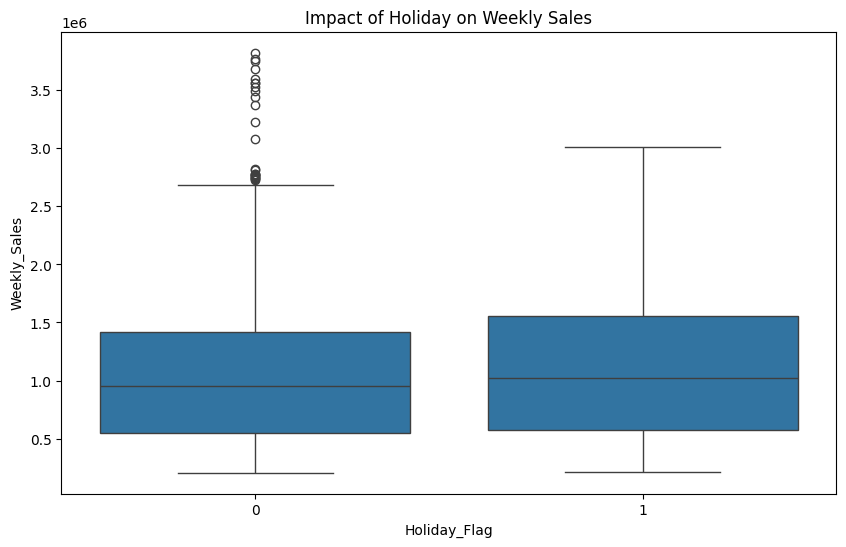

In [17]:
#2. Explore the Impact of a Specific Variable on the Overall Dataset
#Let's explore the impact of Holiday_Flag on Weekly_Sales, hypothesizing that holidays might boost sales.
# Boxplot for Holiday_Flag vs Weekly_Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Impact of Holiday on Weekly Sales')
plt.show()


<ipython-input-18-2ec93e18bd65>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Store', y='Weekly_Sales', data=data, estimator=sum, ci=None)


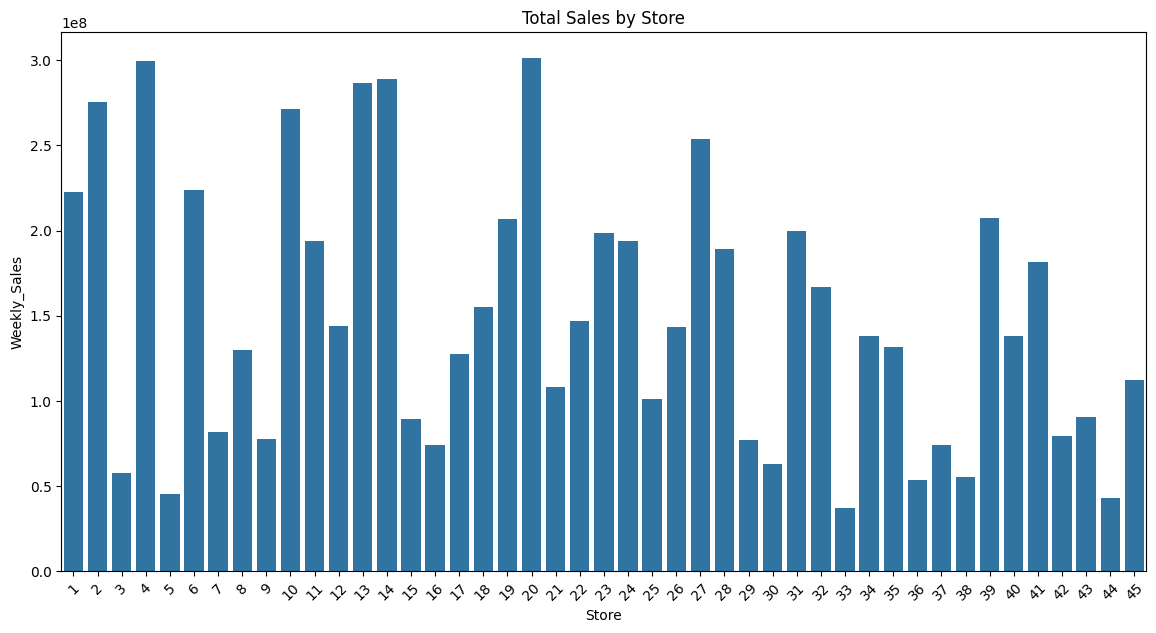

In [18]:
#3. Compare the Performance or Distribution Across Different Categories
#Comparing sales across different stores to see which stores perform better or worse.
# Average Weekly_Sales by Store
plt.figure(figsize=(14, 7))
sns.barplot(x='Store', y='Weekly_Sales', data=data, estimator=sum, ci=None)
plt.title('Total Sales by Store')
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-b58d2a6d7f5c>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


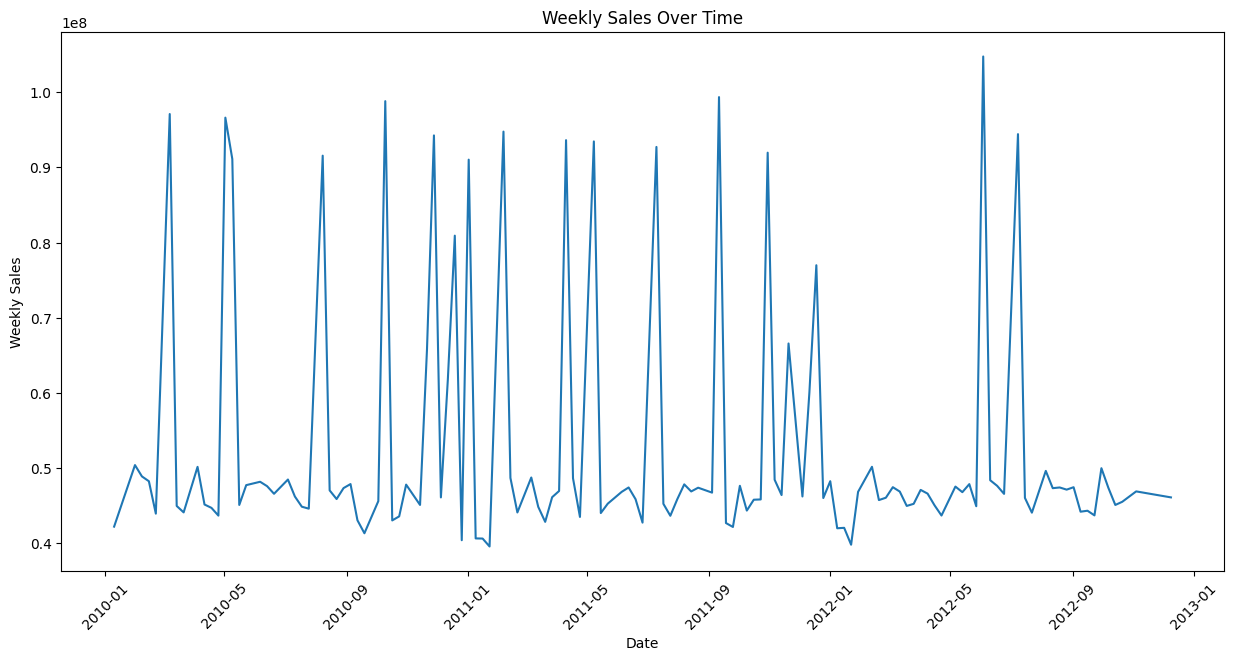

In [19]:
#4. Visualize Changes Over Time and Draw Conclusions
#Visualizing how sales change over the dataset's time period.
# Prepare data for time series plot
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['YearWeek'] = data['Date'].dt.strftime('%Y-%U')
weekly_sales = data.groupby('YearWeek')['Weekly_Sales'].sum().reset_index()
weekly_sales['YearWeek'] = pd.to_datetime(weekly_sales['YearWeek'] + '-0', format='%Y-%U-%w')

# Time Series Plot
plt.figure(figsize=(15, 7))
plt.plot(weekly_sales['YearWeek'], weekly_sales['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-8d5d139a3195>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='Weekly_Sales', hue='Holiday_Flag', data=data, estimator=sum, ci=None)


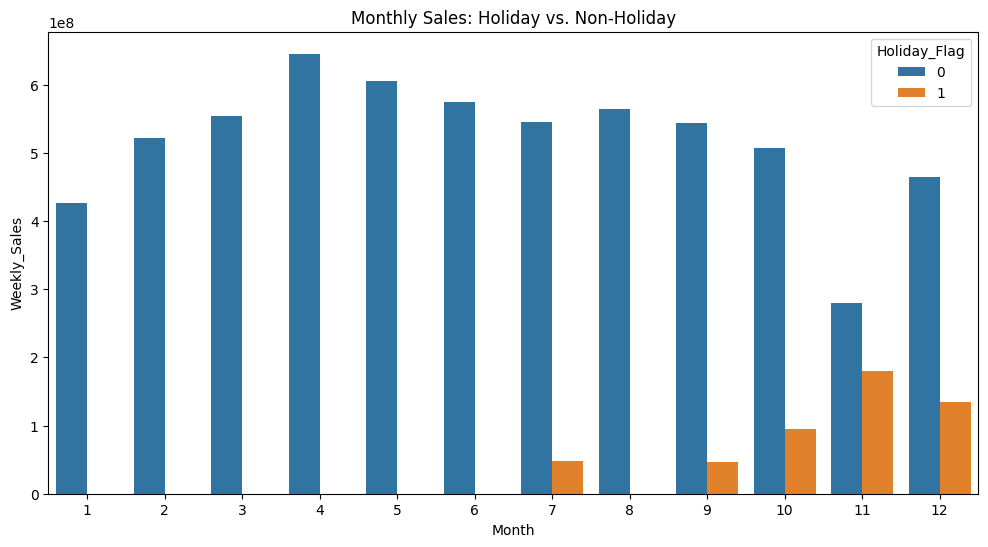

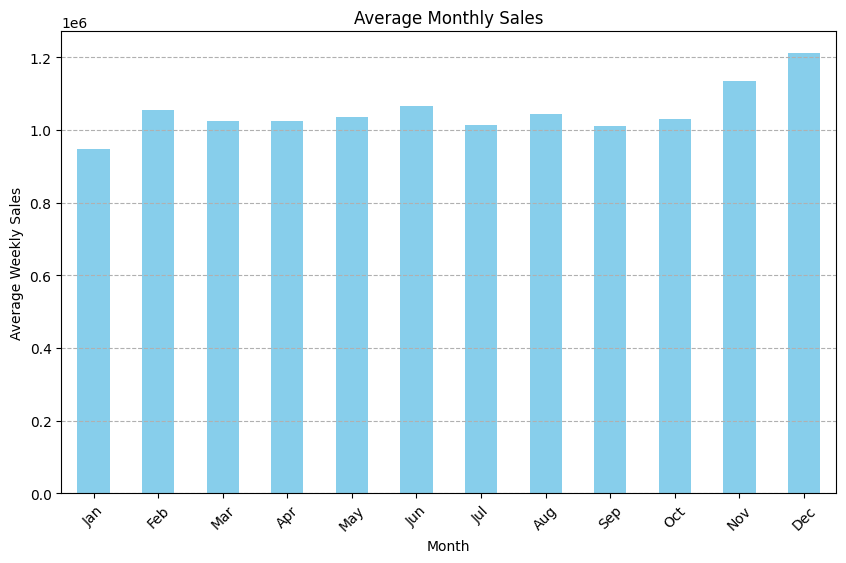

In [20]:
#5. Create a Hypothesis Based on Patterns Observed
#Hypothesis: Sales increase significantly during the holiday weeks, especially towards the end of the year.

#Let's visualize sales around the holiday weeks to support this hypothesis.
# Extract month from date
data['Month'] = data['Date'].dt.month

# Average Sales by Month and Holiday_Flag
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Weekly_Sales', hue='Holiday_Flag', data=data, estimator=sum, ci=None)
plt.title('Monthly Sales: Holiday vs. Non-Holiday')
plt.show()

# computed monthly_sales as shown
monthly_sales = data.groupby(data['Date'].dt.month)['Weekly_Sales'].mean()

# Plotting the bar plot
monthly_sales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(ticks=range(len(monthly_sales)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()